In [143]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from copy import deepcopy
%matplotlib notebook

In [535]:
t = 100     #number of steps
N_el = 3

H = 1/np.sqrt(2) *np.array([[1,1],[1,-1]]) ## Haddamard's coin

G_2 = np.ones((2,2)) - np.eye(2) ## 1d lattice grover's coin
G_4 = 2*np.ones((4,4))/4 - np.eye(4)  ## 2d lattice grover's coin
R = np.array([1,0])
L = np.array([0,1])

1 walker on 2d lattice

$| E \rangle = | RR \rangle, | S \rangle = | RL \rangle, | N \rangle = | LR \rangle,\ | W \rangle = | LL \rangle$

$S_{2d} = \sum_{xy} |x + 1, y \rangle \langle x,y | \otimes | E \rangle \langle E | \\
\qquad + |x, y - 1 \rangle \langle x,y | \otimes | S \rangle \langle S | \\ 
\qquad + |x, y + 1 \rangle \langle x,y | \otimes | N \rangle \langle N | \\
\qquad + |x - 1, y \rangle \langle x,y | \otimes | W \rangle \langle W |$

In [522]:
eyePlus = np.roll(np.eye(N_el), 1, axis=0)
eyeMinus = np.roll(np.eye(N_el), -1, axis=0)
E = np.kron(R,R)
S = np.kron(R,L)
N = np.kron(L,R)
W = np.kron(L,L)
S_2d = None
Ip = np.eye(N_el)
for i in range(N_el):
    for j in range(N_el):
        pos1 = np.outer(np.kron(eyePlus[:,i],Ip[:,j]),np.kron(Ip[:,i],Ip[:,j]))
        direction1 = np.outer(E,E)
        pos2 = np.outer(np.kron(Ip[:,i],eyeMinus[:,j]),np.kron(Ip[:,i],Ip[:,j]))
        direction2 = np.outer(S,S)
        pos3 = np.outer(np.kron(Ip[:,i],eyePlus[:,j]),np.kron(Ip[:,i],Ip[:,j]))
        direction3 = np.outer(N,N)
        pos4 = np.outer(np.kron(eyeMinus[:,i],Ip[:,j]),np.kron(Ip[:,i],Ip[:,j]))
        direction4 = np.outer(W,W)
        if i == 0 and j == 0:
            S_2d = np.kron(pos1, direction1) + np.kron(pos2, direction2) + np.kron(pos3, direction3) + np.kron(pos4, direction4)
        else:
            S_2d =S_2d + np.kron(pos1, direction1) + np.kron(pos2, direction2) + np.kron(pos3, direction3) + np.kron(pos4, direction4)

C = G_4
# C = np.kron(H,H).astype('float64')
I = np.kron(Ip, Ip).astype('float64')
U_2d = S_2d.dot(np.kron(C,I)).astype('float64')
    

2 walkers on 1d lattice

$S = | R \rangle_c \langle R | \otimes \sum_{x} | x+1 \rangle_p \langle x | +  | L \rangle_c \langle L | \otimes \sum_{x} | x-1 \rangle_p \langle x |$

In [524]:
S = np.kron(eyePlus, np.outer(R, R)) + np.kron(eyeMinus, np.outer(L, L))
U = S.dot(np.kron(G_2,Ip)).astype('float64')
# U = S.dot(np.kron(H,Ip)).astype('float64')

Application

$| \psi_0 \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle + | 1 \rangle\right) \otimes | 0 \rangle$

In [525]:
psi0 = np.kron(H, Ip).dot(np.kron(R, Ip[:,0]))
psit = np.linalg.matrix_power(U, t).dot(psi0)

$| \psi_0 \rangle = \frac{1}{2} \left( | 0 \rangle - | 1 \rangle\right) \left( | 0 \rangle - | 1 \rangle\right)\otimes | 0,0 \rangle$

In [526]:
psi0_2d = np.kron(np.kron(H,H), I).dot(np.kron(np.kron(R,R), I[:,0]))
psit_2d = np.linalg.matrix_power(U_2d, t).dot(psi0_2d)

In [527]:
prob_q = np.empty(N_el)
for i in range(N_el):
    posn = Ip[:,i]
    P_i = np.kron(np.eye(2), np.outer(posn,posn))
    proj = P_i.dot(psit)
    prob_q[i] = proj.conjugate().dot(proj).real
prob_q = np.kron(prob_q, prob_q)
prob_q = prob_q.reshape((N_el,N_el))
prob_q

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [528]:
prob1q_2d = np.empty(N_el)
prob2q_2d = np.empty(N_el)
for i in range(N_el):
    posn = Ip[:,i]
    P_i = np.kron(np.eye(C.shape[0]), np.kron(np.outer(posn,posn), Ip))
    proj = P_i.dot(psit_2d)
    prob1q_2d[i] = proj.conjugate().dot(proj).real
for i in range(N_el):
    posn = Ip[:,i]
    P_i = np.kron(np.eye(C.shape[0]), np.kron(Ip,np.outer(posn,posn)))
    proj = P_i.dot(psit_2d)
    prob2q_2d[i] = proj.conjugate().dot(proj).real
prob_q_2d = np.kron(prob1q_2d, prob2q_2d)
prob_q_2d = prob_q_2d.reshape((N_el,N_el))
prob_q_2d

array([[0.26735429, 0.0695358 , 0.13028846],
       [0.17195437, 0.04472337, 0.08379768],
       [0.13296566, 0.03458285, 0.06479751]])

<IPython.core.display.Javascript object>


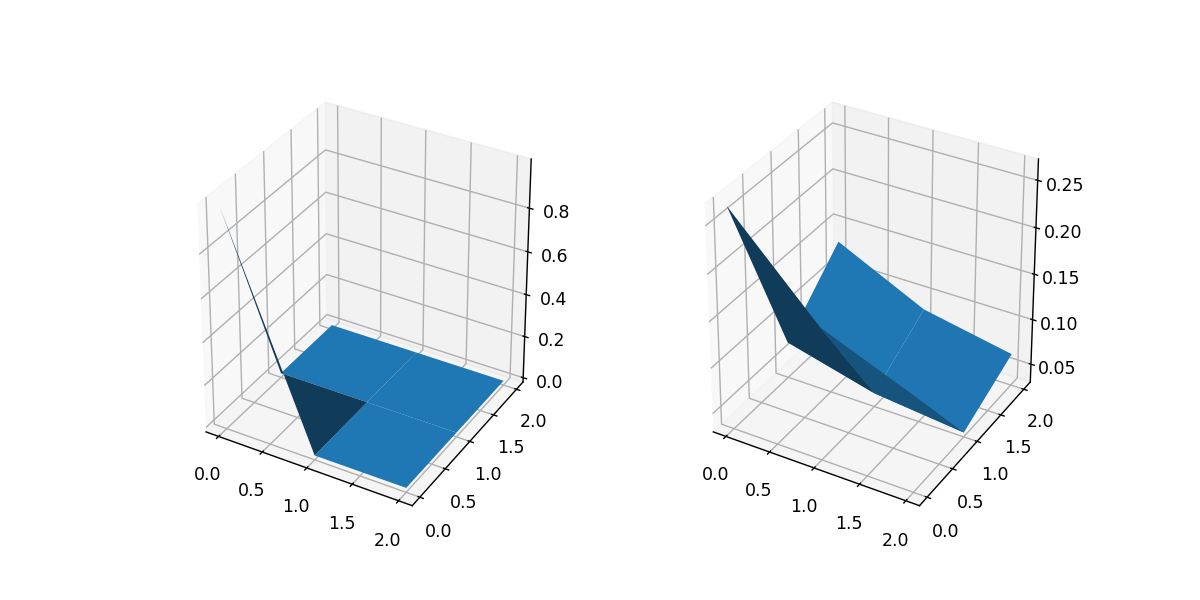

In [529]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
z = list(itertools.product(np.arange(N_el), np.arange(N_el)))
x,y = np.arange(N_el), np.arange(N_el)
x, y = np.meshgrid(x,y)
z1 = prob_q[x,y]
z2 = prob_q_2d[x,y]
ax1.plot_surface(x,y,z1)
ax2.plot_surface(x,y,z2)
plt.show()

#### References
* Amanda C. Oliveira,Renato Portugal, Raul Donangelo, Two-Dimensional Quantum Walks with Boundaries. WECIQ (2006). Available at http://ppginf.ucpel.tche.br/weciq/CD/Artigos/AmandaOliveira/amanda-oliveira.pdf
* J. Rodrigues, N. Paunković, P. Mateus, A Simulator for Discrete Quantum Walks on Lattices. Available at https://sqig.math.tecnico.ulisboa.pt/pub/MateusP/17-RNM-QWSim.pdf
* Peter P. Rohde, Andreas Schreiber, Martin Stefanak, Igor Jex, Alexei Gilchrist, Christine Silberhorn, Increasing the dimensionality of quantum walks using multiple walkers. Journal of Computational and Theoretical Nanoscience, 10, 1644 (2013). Available at https://arxiv.org/abs/1205.1850